# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.

Dataset yang saya gunakan dalam proyek ini adalah Clothes Price Prediction yang diambil dari Kaggle (https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction/data). Data ini mencakup berbagai fitur yang terkait dengan item pakaian beserta harganya.
Dataset ini memiliki 6 kolom, yaitu :
- Brand : Merek pakaian, dipilih dari pilihan merek populer termasuk Nike, Adidas, Puma, Under Armour, Reebok, dan Under Armor
- Category : Kategori item pakaian, seperti Jeans, Dress, Jacket, Sweater, atau Shoes.
- Color  : Warna pakaian, dipilih dari berbagai warna termasuk Red, Blue, Green, Yellow, Black, dan White.
- Size : Ukuran item pakaian, diwakili sebagai XS, S, M, L, XL, atau XXL.
- Material : Komposisi bahan dari item pakaian, termasuk pilihan seperti Cotton, Polyester, Nylon, Wool, Silk, dan Denim.
- Price : Harga suatu item pakaian, diukur dalam mata uang lokal.

Dataset ini terdiri dari 1000 data, dimana satu beris merepresentasikan harga pakaian dari setiap brand, kategori, warna, ukuran, dan material.
Dataset ini berguna untuk digunakan untuk analisis harga pakaian atau pemodelan statistik yang bertujuan untuk memprediksi harga pakaian berdasarkan atributnya.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"farisghina","key":"a9bf152695d953cf4e5c887ab3662094"}'}

In [3]:
# Buat direktori dan ubah izin file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Download dataset
!kaggle datasets download -d mrsimple07/clothes-price-prediction

# Unzip dataset dan hapus file zip
!unzip clothes-price-prediction.zip

Dataset URL: https://www.kaggle.com/datasets/mrsimple07/clothes-price-prediction
License(s): apache-2.0
  0% 0.00/6.24k [00:00<?, ?B/s]
100% 6.24k/6.24k [00:00<00:00, 1.35MB/s]
Archive:  clothes-price-prediction.zip
  inflating: clothes_price_prediction_data.csv  


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [4]:
# Membuat dataset menjadi dataframe dengan nama 'df'
df = pd.read_csv('clothes_price_prediction_data.csv')
# Preview dataframe dari dataset yang sudah dibuat
df

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113
...,...,...,...,...,...,...
995,Puma,Jeans,Black,L,Polyester,176
996,Puma,Jacket,Red,XXL,Silk,110
997,Reebok,Sweater,Blue,XS,Denim,127
998,Under Armour,Sweater,Black,XXL,Denim,69


In [5]:
df.head()

,Brand,Category,Color,Size,Material,Price
0,New Balance,Dress,White,XS,Nylon,182
1,New Balance,Jeans,Black,XS,Silk,57
2,Under Armour,Dress,Red,M,Wool,127
3,Nike,Shoes,Green,M,Cotton,77
4,Adidas,Sweater,White,M,Nylon,113


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Brand     1000 non-null   object
 1   Category  1000 non-null   object
 2   Color     1000 non-null   object
 3   Size      1000 non-null   object
 4   Material  1000 non-null   object
 5   Price     1000 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 47.0+ KB


In [7]:
print("jumlah data duplikat: ", df.duplicated().sum())
print("jumlah missing value: ", df.isnull().sum())

jumlah data duplikat:  0
jumlah missing value:  Brand       0
Category    0
Color       0
Size        0
Material    0
Price       0
dtype: int64


Tidak terdapat missing value ataupun data duplikat

In [8]:
df.shape

(1000, 6)

Terdapat 1000 baris data dengan 6 kolom

In [9]:
df.describe(include="all")

,Brand,Category,Color,Size,Material,Price
count,1000,1000,1000,1000,1000,1000.000000
unique,6,6,6,6,6,NaN
top,Under Armour,Jacket,Yellow,XS,Polyester,NaN
freq,179,191,173,196,175,NaN
mean,NaN,NaN,NaN,NaN,NaN,106.289000
std,NaN,NaN,NaN,NaN,NaN,53.695444
min,NaN,NaN,NaN,NaN,NaN,10.000000
25%,NaN,NaN,NaN,NaN,NaN,59.750000
50%,NaN,NaN,NaN,NaN,NaN,108.000000
75%,NaN,NaN,NaN,NaN,NaN,150.000000


- Merek paling banyak: Under Armour dengan 179 data
- Kategori produk terbanyak: Jacket dengan 191 data
- Warna dominan: Yellow dengan 173 data
- Ukuran yang paling banyak: XS dengan 196 data
- Material yang paling sering digunakan: Polyester dengan 175 data
- Rata-rata harga (mean) adalah `$106.29`, dengan standar deviasi (std) sebesar `$53.70`, yang menunjukkan bahwa harga memiliki sebaran cukup luas.
- Harga minimum adalah `$10`, dan maksimum adalah `$199`.


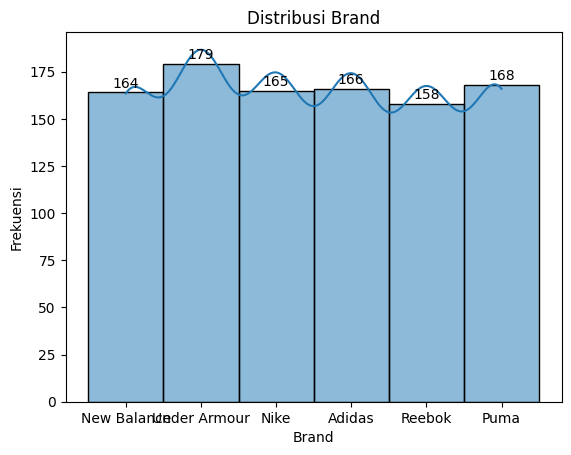

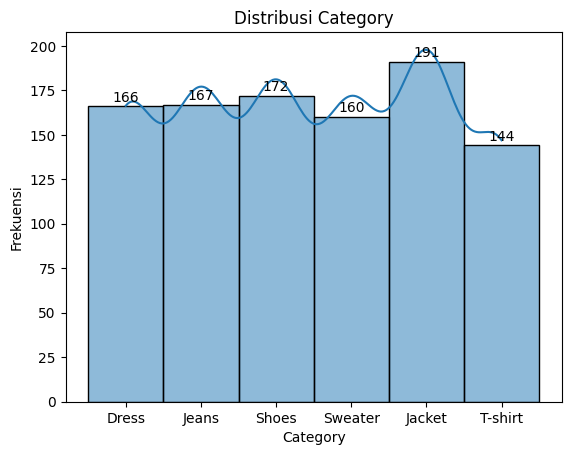

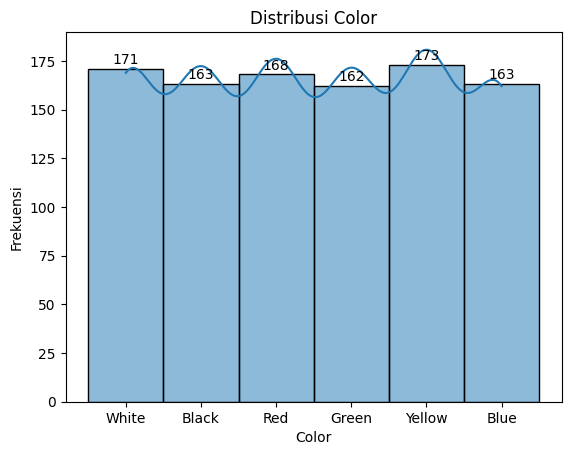

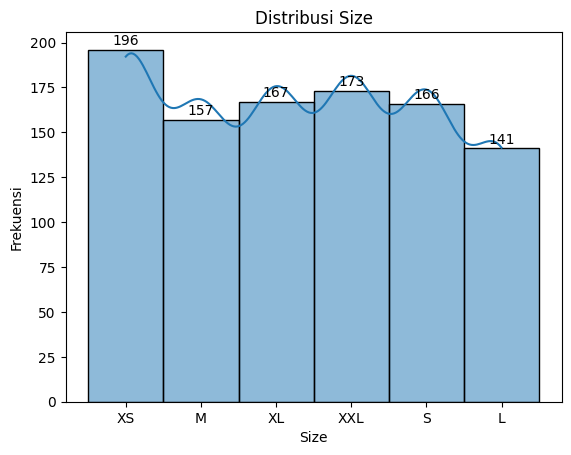

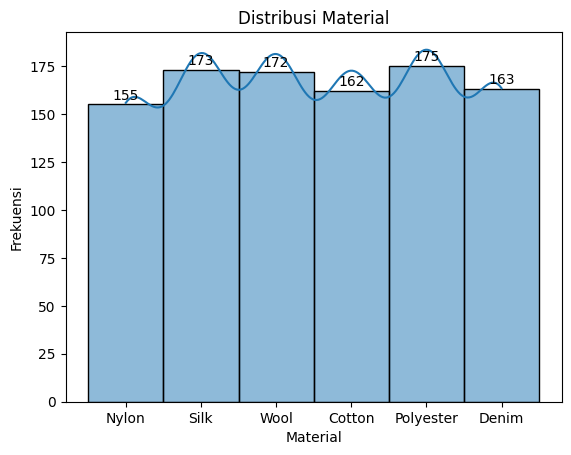

In [10]:
# Visualisasi fitur kategorikal
categorical_features = df.select_dtypes(include=['object']).columns
for col in categorical_features:
    ax = sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
    plt.show()

merek paling dominan adalah under armour dengan 179 produk, tetapi frekuensi antar brand cukup merata dengan selisih tidak terlalu jauh,
begitu juga dengan distribusi warna, kategori, dan material menunjukkan bahwa dataset relatif seimbang. pada distribusi ukuran terdapat
nilai paling mencolok yaitu pada ukuran XS dengan 196 data, dan terkecil pada ukuran L dengan 141 data

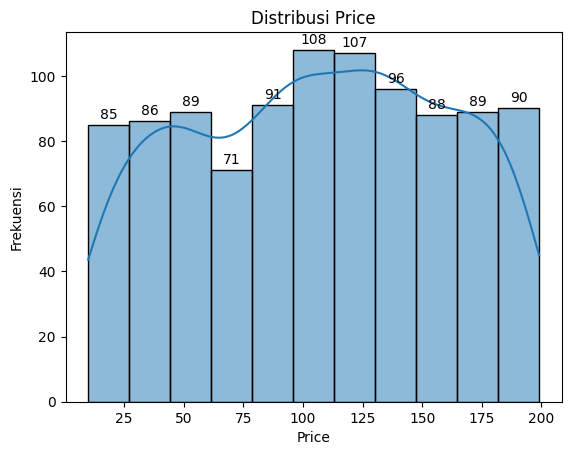

In [11]:
# Visualisasi fitur numerik
numerical_features = df.select_dtypes(include=['number']).columns
for col in numerical_features:
    ax = sns.histplot(data=df, x=col, kde=True)
    plt.title(f"Distribusi {col}")
    plt.xlabel(col)
    plt.ylabel("Frekuensi")
    for p in ax.patches:
            height = p.get_height()
            ax.text(p.get_x() + p.get_width() / 2, height + 1, int(height), ha='center', va='bottom')
    plt.show()

Distribusi relatif merata, namun memiliki sedikit kecenderungan ke tengah (sekitar harga 100-130), di mana frekuensi tertinggi terdapat pada:
- Harga sekitar 100-120: 108 produk
- Harga sekitar 120-140: 107 produk

Harga paling sedikit ditemui adalah kisaran 60–80, hanya sekitar 71 produk

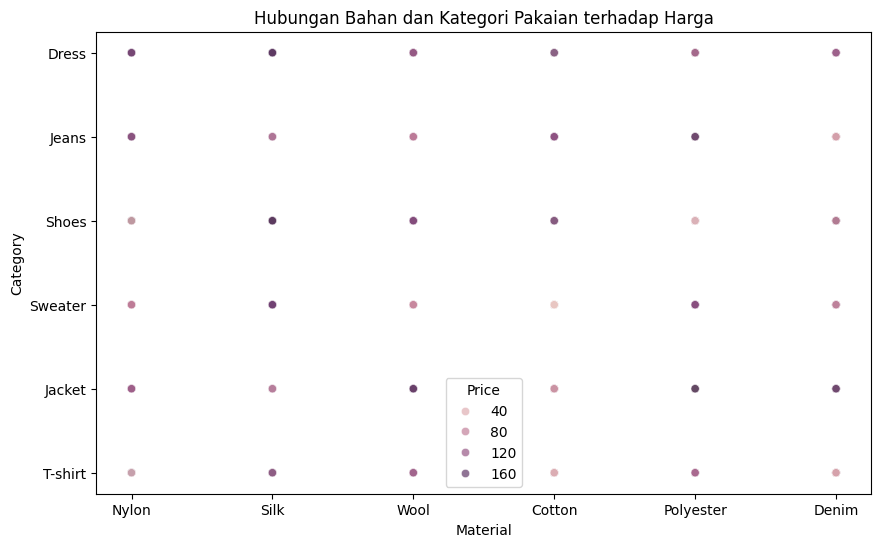

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Material', y='Category', hue='Price', data=df, alpha=0.7)
plt.title('Hubungan Bahan dan Kategori Pakaian terhadap Harga')
plt.show()

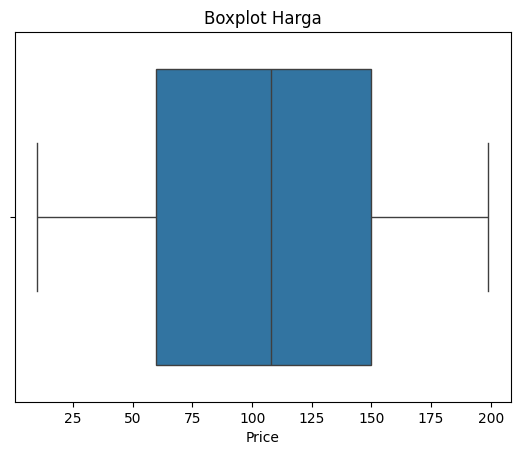

In [13]:
sns.boxplot(x=df['Price'])
plt.title("Boxplot Harga")
plt.show()

Tidak ada outlier, artinya data sudah bersih

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

Model machine learning tidak dapat langsung memproses data non-numerik seperti brand, category. Encoding mengubah data kategori menjadi format numerik yang bisa dimengerti model. Tahap ini memproses fitur kategori menjadi bentuk numerik agar dapat digunakan oleh algoritma klasifikasi.

In [14]:
# Encode fitur kategorikal
label_encoders = {}
for column in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
df.head()

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113


Untuk melatih model, data dipisahkan menjadi fitur input (X) dan label target (y). Target (price) tidak boleh termasuk dalam fitur.

In [15]:
# Pisahkan fitur dan target
X = df.drop("Price", axis=1)
y = df["Price"]

Beberapa algoritma machine learning sensitif terhadap skala fitur. Standarisasi membuat fitur memiliki rata-rata 0 dan standar deviasi 1, sehingga model dapat belajar lebih efisien. Standarisasi akan menormalkan data agar pelatihan model menjadi lebih stabil dan cepat konvergen.

In [16]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
#Normalisasi Fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
df.head()

,Brand,Category,Color,Size,Material,Price
0,1,0,4,4,2,182
1,1,2,0,4,4,57
2,5,0,3,1,5,127
3,2,3,2,1,0,77
4,0,4,4,1,2,113


Untuk mengevaluasi performa model, data dibagi menjadi data latih (train) dan data uji (test). Ini mencegah model hanya "menghafal" data latih tapi gagal prediksi data baru.

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Export Data

In [ ]:
df.to_csv('clothes_price_prediction_preprocessing.csv', index=False)